In [ ]:
import numpy as np
import pandas as pd
import collections
from collections import deque

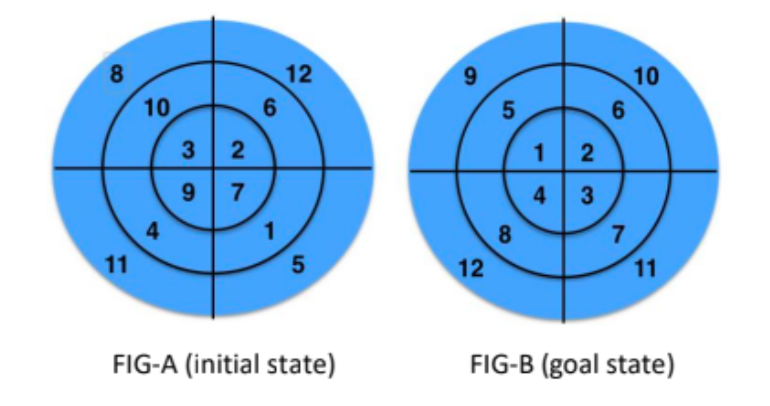

In [ ]:
# Given state
given = [3,2,7,9,10,6,1,4,8,12,5,11]
goal = [1,2,3,4,5,6,7,8,9,10,11,12]

In [ ]:
#Goal State reached

def equal(arr1,arr2):
  return np.array_equal(arr1,arr2)  

In [ ]:
#Heuristic function 

def heuristic(arr,arr2):

  arr2 = goal
  assert(len(arr)==len(arr2))

  count =0

  for i in range(len(arr)):
    if(arr[i]==arr2[i]):
      count+=2

  ''' num_ring = 0
  for i in range(3):
    num_ring+=same_ring(arr1[4*i:4*(i+1)],arr2[4*i:4*(i+1)])
  
  count = count+num_ring
  '''

  num = 0
  for i in range(len(arr)):
    if(arr[0]==arr[1] or arr[3] or arr[4]):
      num+=1

    if(arr[1]==arr[0] or arr[2] or arr[5]):
      num+=1

    if(arr[2]==arr[1] or arr[3] or arr[6]):
      num+=1

    if(arr[3]==arr[0] or arr[3] or arr[7]):
      num+=1

    if(arr[4]==arr[0] or arr[5] or arr[7] or arr[8]):
      num+=1

    if(arr[5]==arr[4] or arr[6] or arr[1] or arr[9]):
      num+=1

    if(arr[6]==arr[2] or arr[5] or arr[7] or arr[10]):
      num+=1

    if(arr[7]==arr[3] or arr[6] or arr[4] or arr[11]):
      num+=1    

    if(arr[8]==arr[4] or arr[9] or arr[11]):
      num+=1

    if(arr[9]==arr[5] or arr[8] or arr[10]):
      num+=1   

    if(arr[10]==arr[11] or arr[6] or arr[9]):
      num+=1
      
    if(arr[11]==arr[7] or arr[8] or arr[10]):
      num+=1                
      
  count = count+num

  return count

In [ ]:
def swapList(sl,pos1,pos2):
    n = len(sl)     
    # Swapping 
    temp = sl[pos1]
    sl[pos1] = sl[pos2]
    sl[pos2] = temp
    return sl  

def clockwise(arr):
  n = arr[0]
  arr.pop(0)
  arr.append(n)
  return arr

def shift(seq, n=0):
    a = n % len(seq)
    return seq[-a:] + seq[:-a]


In [ ]:
#Generate all possible next solutions

def next_states(arr):

  arr_possible_states = []

  arr1 = tuple(arr)

  
  #Swapping (8 states)

  for i in range(4):
    arr_possible_states.append(swapList(list(arr1),i,i+4))

  for i in range(4):
    arr_possible_states.append(swapList(list(arr1),i+4,i+8))

 

  #Clockwise (3 states)
  a = list(arr1)
  arr_possible_states.append(clockwise(a[0:4]) + a[4:])
  arr_possible_states.append(a[:4]+ clockwise(a[4:8]) + a[8:])
  arr_possible_states.append(a[:8]+clockwise(a[8:]))


  # Anti-Clockwise (3 states)

  arr_possible_states.append(shift(a[0:4],1) + a[4:])
  arr_possible_states.append(a[:4]+ shift(a[4:8],1) + a[8:])
  arr_possible_states.append(a[:8]+shift(a[8:],1))


  return arr_possible_states  



In [ ]:
next_states(given)

[[10, 2, 7, 9, 3, 6, 1, 4, 8, 12, 5, 11],
 [3, 6, 7, 9, 10, 2, 1, 4, 8, 12, 5, 11],
 [3, 2, 1, 9, 10, 6, 7, 4, 8, 12, 5, 11],
 [3, 2, 7, 4, 10, 6, 1, 9, 8, 12, 5, 11],
 [3, 2, 7, 9, 8, 6, 1, 4, 10, 12, 5, 11],
 [3, 2, 7, 9, 10, 12, 1, 4, 8, 6, 5, 11],
 [3, 2, 7, 9, 10, 6, 5, 4, 8, 12, 1, 11],
 [3, 2, 7, 9, 10, 6, 1, 11, 8, 12, 5, 4],
 [2, 7, 9, 3, 10, 6, 1, 4, 8, 12, 5, 11],
 [3, 2, 7, 9, 6, 1, 4, 10, 8, 12, 5, 11],
 [3, 2, 7, 9, 10, 6, 1, 4, 12, 5, 11, 8],
 [9, 3, 2, 7, 10, 6, 1, 4, 8, 12, 5, 11],
 [3, 2, 7, 9, 4, 10, 6, 1, 8, 12, 5, 11],
 [3, 2, 7, 9, 10, 6, 1, 4, 11, 8, 12, 5]]

In [ ]:
#Steepest ascent hill climbing

given = [3,2,7,9,10,6,1,4,8,12,5,11]
goal = [1,2,3,4,5,6,7,8,9,10,11,12]

path = []
path.append(given)
next = given

for i in range(100):

  if(equal(next,goal)):
    path.append(goal)
    print("Goal reached !")
    break
  else:
    next_state = next_states(next)


    m = heuristic(next_state[0],goal)
    current = next_state[0]

    for n in next_state:
      if(heuristic(n,goal)>=m):
        current = n
        m = heuristic(n,goal)

    print(current)
    path.append(current)
    next = current 


[3, 2, 7, 9, 10, 6, 1, 4, 12, 5, 11, 8]
[3, 2, 7, 9, 10, 6, 1, 8, 12, 5, 11, 4]
[3, 2, 1, 9, 10, 6, 7, 8, 12, 5, 11, 4]
[3, 2, 1, 9, 10, 6, 7, 8, 5, 11, 4, 12]
[3, 2, 1, 9, 5, 6, 7, 8, 10, 11, 4, 12]
[3, 2, 1, 9, 5, 6, 7, 8, 12, 10, 11, 4]
[9, 3, 2, 1, 5, 6, 7, 8, 12, 10, 11, 4]
[1, 9, 3, 2, 5, 6, 7, 8, 12, 10, 11, 4]
[1, 9, 3, 2, 5, 6, 7, 8, 10, 11, 4, 12]
[1, 9, 3, 2, 5, 6, 7, 8, 12, 10, 11, 4]
[1, 9, 3, 2, 5, 6, 7, 8, 10, 11, 4, 12]
[1, 9, 3, 2, 5, 6, 7, 8, 12, 10, 11, 4]
[1, 9, 3, 2, 5, 6, 7, 8, 10, 11, 4, 12]
[1, 9, 3, 2, 5, 6, 7, 8, 12, 10, 11, 4]
[1, 9, 3, 2, 5, 6, 7, 8, 10, 11, 4, 12]
[1, 9, 3, 2, 5, 6, 7, 8, 12, 10, 11, 4]
[1, 9, 3, 2, 5, 6, 7, 8, 10, 11, 4, 12]
[1, 9, 3, 2, 5, 6, 7, 8, 12, 10, 11, 4]
[1, 9, 3, 2, 5, 6, 7, 8, 10, 11, 4, 12]
[1, 9, 3, 2, 5, 6, 7, 8, 12, 10, 11, 4]
[1, 9, 3, 2, 5, 6, 7, 8, 10, 11, 4, 12]
[1, 9, 3, 2, 5, 6, 7, 8, 12, 10, 11, 4]
[1, 9, 3, 2, 5, 6, 7, 8, 10, 11, 4, 12]
[1, 9, 3, 2, 5, 6, 7, 8, 12, 10, 11, 4]
[1, 9, 3, 2, 5, 6, 7, 8, 10, 11, 4, 12]
